# Modelagem, Simulação e Implementação de Sistemas
-------------------------------------

## Lista I - Revisão de Transformada de Laplace
#### Guilherme Brandão da Silva 

In [1]:
% Módulos para os Cálculos de Laplace e Operações Simbólicas
pkg load control
pkg load symbolic

% Variáveis Simbólicas
syms s t x(t)

Symbolic pkg v2.7.0: Python communication link active, SymPy v1.2.


**Exercício 1-a**: Ache as transformadas de Laplace inversa de:

$$F(s) = \frac{(s+3)}{(s+1)(s+2)}$$

In [2]:
% Declaração da Função
f = (s+3)/(s^2+3*s+2)

% Cálculo da Inversa de Laplace
ilaplace(f)

f = (sym)

     s + 3    
  ────────────
   2          
  s  + 3⋅s + 2

ans = (sym)

  ⎛   t    ⎞  -2⋅t
  ⎝2⋅ℯ  - 1⎠⋅ℯ    



**Exercício 1-b**: Ache as transformadas de Laplace inversa de:

$$G(s) = \frac{(s^3+5s^2+9s+7)}{(s+1)(s+2)}$$

In [4]:
% Declaração da Função
num = [1 5 9 7];
den = conv([1 1], [1 2]);

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = r(1)/(s-p(1)) + r(2)/(s-p(2)) + s*k(1) + k(2);

% Cálculo da Inversa de Laplace
ilaplace(F, s)

ans = (sym)

                                                       -s    -2⋅s
  InverseLaplaceTransform(s, s, s, None) + 2⋅δ(s) + 2⋅ℯ   - ℯ    



**Exercício 2-a:** Obtenha as expanção em frações parciais e encontre a transformada inversa de Laplace de:
$$\frac{B(s)}{A(s)} = \frac{2s^3 + 5s^2 + 3s + 6}{s^3 + 6s^2 + 11s + 6} $$

In [5]:
% Declaração da Função
num = [2 5 3 6];
den = [1 6 11 6];

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = 3/(s+1) + -4/(s+2) + -6/(s+3)

% Cálculo da Inversa de Laplace
f = ilaplace(F, s)

F = (sym)

      6       4       3  
  - ───── - ───── + ─────
    s + 3   s + 2   s + 1

f = (sym)

  ⎛   2⋅s      s    ⎞  -3⋅s             
  ⎝3⋅ℯ    - 4⋅ℯ  - 6⎠⋅ℯ    ⋅Heaviside(s)



**Exercício 2-b:** Obtenha as expanção em frações parciais e encontre a transformada inversa de Laplace de:
$$\frac{B(s)}{A(s)} = \frac{2s^2 + 2s + 3}{(s + 1)^3} $$

In [6]:
% Declaração da Função
num = [2 2 3];
den = conv(conv([1 1], [1 1]), [1 1]);

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = 2/(s+1) + -2/(s+1)^2 + 3/(s+1)^3

% Cálculo da Inversa de Laplace
f = ilaplace(F)

F = (sym)

    2        2          3    
  ───── - ──────── + ────────
  s + 1          2          3
          (s + 1)    (s + 1) 

f = (sym)

  ⎛   2          ⎞  -t
  ⎝3⋅t  - 4⋅t + 4⎠⋅ℯ  
  ────────────────────
           2          



**Exercício 3-a:** Resolva a equação diferencial:
$$ \ddot{x} + 2\dot{x} + 5x = 3,$$
com as seguintes condições:
$$\dot{x}(0) = 0 $$
$$x(0) = 0$$

In [7]:
% Equanção Diferencial
eqn = diff(x,t, t)  + 2*diff(x, t) + 5*x == 3;

% Condições Iniciais
cond1 = diff(x)(0) == 0;
cond2 = x(0) == 0;

% Solução da Equação Diferencial
r = dsolve(eqn, cond1, cond2)

r = (sym)

         ⎛  3⋅sin(2⋅t)   3⋅cos(2⋅t)⎞  -t   3
  x(t) = ⎜- ────────── - ──────────⎟⋅ℯ   + ─
         ⎝      10           5     ⎠       5



**Exercício 3-b:** Resolva a equação diferencial:
$$ 2\ddot{x} + 7\dot{x} + 3x = 0,$$
com as seguintes condições:
$$\dot{x}(0) = 0 $$
$$x(0) = 3$$


In [8]:
% Equanção Diferencial
eqn = 2*diff(x,t, t) + 7*diff(x, t) + 3*x == 0;

% Condições Iniciais
cond1 = diff(x)(0) == 0;
cond2 = x(0) == 3;

% Solução da Equação Diferencial
r = dsolve(eqn, cond1, cond2)


r = (sym)

              -3⋅t            
           3⋅ℯ           18   
  x(t) = - ─────── + ─────────
              5           ____
                         ╱  t 
                     5⋅╲╱  ℯ  



**Exercício 4-a:** Considere a seguinte função de transferência:
$$G(s) = \frac{6s^2 + 1}{s^3 + 3s^2 + 3s + 1}$$
Obtenha seu diagrama de Polos e Zeros.



Transfer function 'F' from input 'u1' to output ...

            6 s^2 + 1      
 y1:  ---------------------
      s^3 + 3 s^2 + 3 s + 1

Continuous-time model.


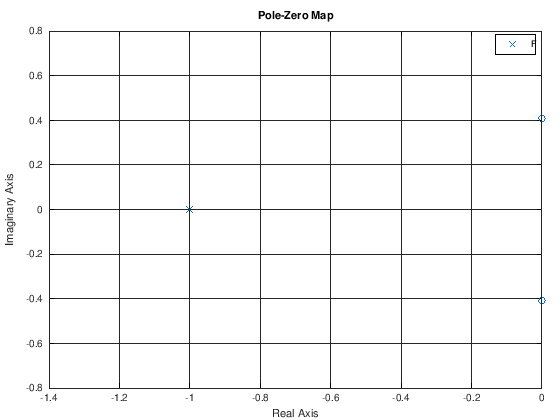

In [10]:
% Montagem da Função de Transferência  
num = [6 0 1];
den = [1 3 3 1];
F = tf(num, den)
 
% Extração dos Polos e Zeros
pzmap(F)

**Exercício 4-b:** Considere a seguinte função de transferência:
$$H(s) = \frac{(s+1)(s+2)}{(s+2i)(s-2i)(s+3)}$$
Obtenha seu diagrama de Polos e Zeros.



Transfer function 'F' from input 'u1' to output ...

          s^2 + 3 s + 2     
 y1:  ----------------------
      s^3 + 3 s^2 + 4 s + 12

Continuous-time model.


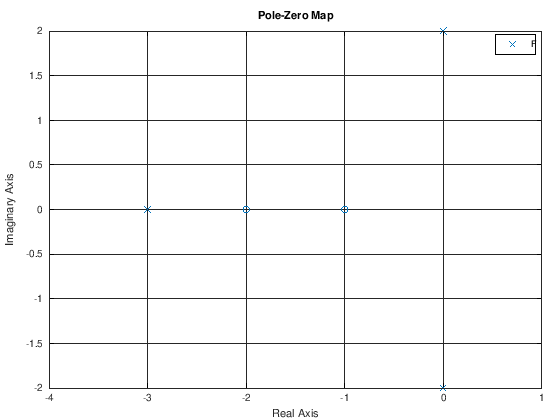

In [9]:
% Montagem da Função de Transferência  
num = conv([1 1], [1 2]);
den = conv(conv([1 2i], [1 -2i]), [1 3]);
F = tf(num, den)
 
% Extração dos Polos e Zeros
pzmap(F)